# Mapeando el Universo



## Análisis y Visualización

 En este primer trabajo comenzaremos a explorar los datos, para ello se propone responder las siguientes consignas:
 
**1 - Análisis general**
 
 * Describir el conjunto de datos, indicando cantidad de variables, qué representa cada una, tipo, etc.
 * Considerando el objetivo pricipal de la mentoría, cuáles creen que serían las variables más importantes a considerar?
 
**2 - Análisis estadístico**
 
 * Es la distribución de galaxia uniforme sobre la bóveda celeste?
 * Considerando una "rebanada" sobre el plano celeste, grafiquen la distribución de galaxias considerando el corrimiento al rojo como la distancia.
 * Cómo son las distribuciones de las magnitudes de las galaxias en las diferentes bandas?
 * Cuál es la distribución del corrimiento al rojo de las galaxias?
 * Existe correlación entre las diferentes variables?
 * Realicen gráficos boxplot para identificar outliers.
 * Utilizando las magnitudes es posible construir índices colores, por ejemplo u-g o g-r. Analicen la distribución de algunos de estos índices. Se observa algo en particular?
 * Analice si exite alguna relación entre algún índice de color y el tipo morfológico. Pueden ajustar las distribuciones de color para cada tipo morfológico con una función normal y ver si encuentran diferencias.
 * Mostrar si los valores de las medianas de las distribuciones de z para cada clase (E,S e I) son estadśticamente diferentes.

### Lectura de datos

Esto es una manera, pueden utilizar las que más les convenga

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
filename = "dataset/dataset_short.csv"

In [13]:
df = pd.read_csv(filename,index_col=0)

In [14]:
df.index.max()

3341830154740590592

In [15]:
df.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_u,expPhi_g,expPhi_r,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,88.794310,87.360266,88.887199,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,57.854492,56.442004,56.147341,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-83.074030,-90.508710,-90.101060,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,43.378330,44.293123,46.491595,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,88.246740,86.045460,89.176195,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,134.898150,130.424700,131.439100,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604300,240.368900,255.055200,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440


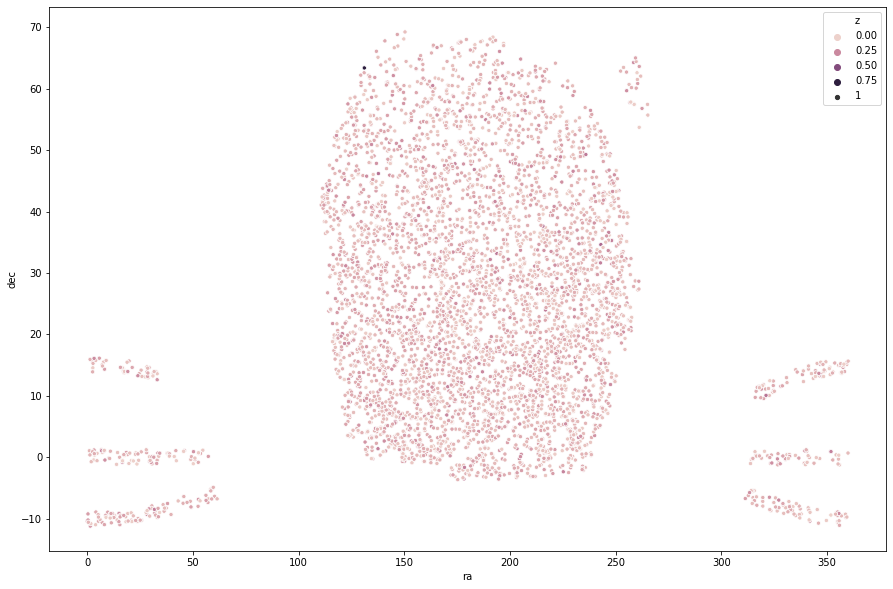

In [16]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)

sns.scatterplot(x='ra',y='dec',data=df,hue='z',size=1,ax=ax)

Aquí otro ejemplo de una visualización que pueden realizar
![Sloan Great Wall](images/greatWall.jpg)

### Uniendo dataframes

Vamos a ir un poco más allá y vamos a unir la tabla anterior con otra donde para algunas de las galaxias la gente a votado si se corresponde con una galaxia espiral, eliptica o irregular.

In [17]:
filename = 'dataset/dataset_short_zoo.csv'

In [18]:
zoo = pd.read_csv(filename,index_col=0)

In [19]:
dd = df.join(zoo)

In [20]:
dd.describe()

,z,zErr,zWarning,velDisp,velDispErr,ra,dec,raErr,decErr,modelMag_u,...,expPhi_i,expPhi_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,spiral,elliptical,uncertain
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.106732,0.000021,0.016000,136.691611,14.852510,184.204791,25.125391,0.016671,0.016180,19.539480,...,89.332310,88.817731,0.132420,0.103181,0.071380,0.053043,0.039454,0.28880,0.099800,0.611400
std,0.054623,0.000013,0.466248,75.595506,19.427326,57.759337,18.694276,0.041910,0.033692,1.076405,...,55.664620,54.975755,0.086213,0.067177,0.046472,0.034534,0.025687,0.45325,0.299763,0.487481
min,0.010423,0.000003,0.000000,0.000000,-3.000000,0.001718,-11.179560,0.001259,0.001218,15.335180,...,-84.125630,-82.517460,0.022077,0.017202,0.011901,0.008843,0.006578,0.00000,0.000000,0.000000
25%,0.066716,0.000011,0.000000,84.571003,9.171935,150.622355,10.275177,0.005682,0.005586,18.939248,...,47.244455,48.280400,0.075577,0.058889,0.040739,0.030274,0.022518,0.00000,0.000000,0.000000
50%,0.100656,0.000019,0.000000,131.921400,12.240650,184.413855,23.384139,0.008408,0.008254,19.595610,...,89.443595,89.212245,0.111950,0.087231,0.060346,0.044843,0.033355,0.00000,0.000000,1.000000
75%,0.138991,0.000028,0.000000,182.166950,16.379272,219.592476,39.191761,0.015174,0.015143,20.245438,...,131.357875,129.700900,0.165019,0.128582,0.088952,0.066101,0.049167,1.00000,0.000000,1.000000
max,0.746932,0.000305,16.000000,850.000000,1131.371000,359.995051,69.241324,1.817576,0.789803,28.112870,...,249.604200,249.604200,1.098986,0.856323,0.592400,0.440217,0.327440,1.00000,1.000000,1.000000
